In [16]:
from sqlalchemy import create_engine
import pandas as pd
from plotnine import *

In [17]:
engine = create_engine('sqlite:///../data/rainy.db', echo=False, isolation_level="AUTOCOMMIT")

with engine.connect() as conn:
    pass

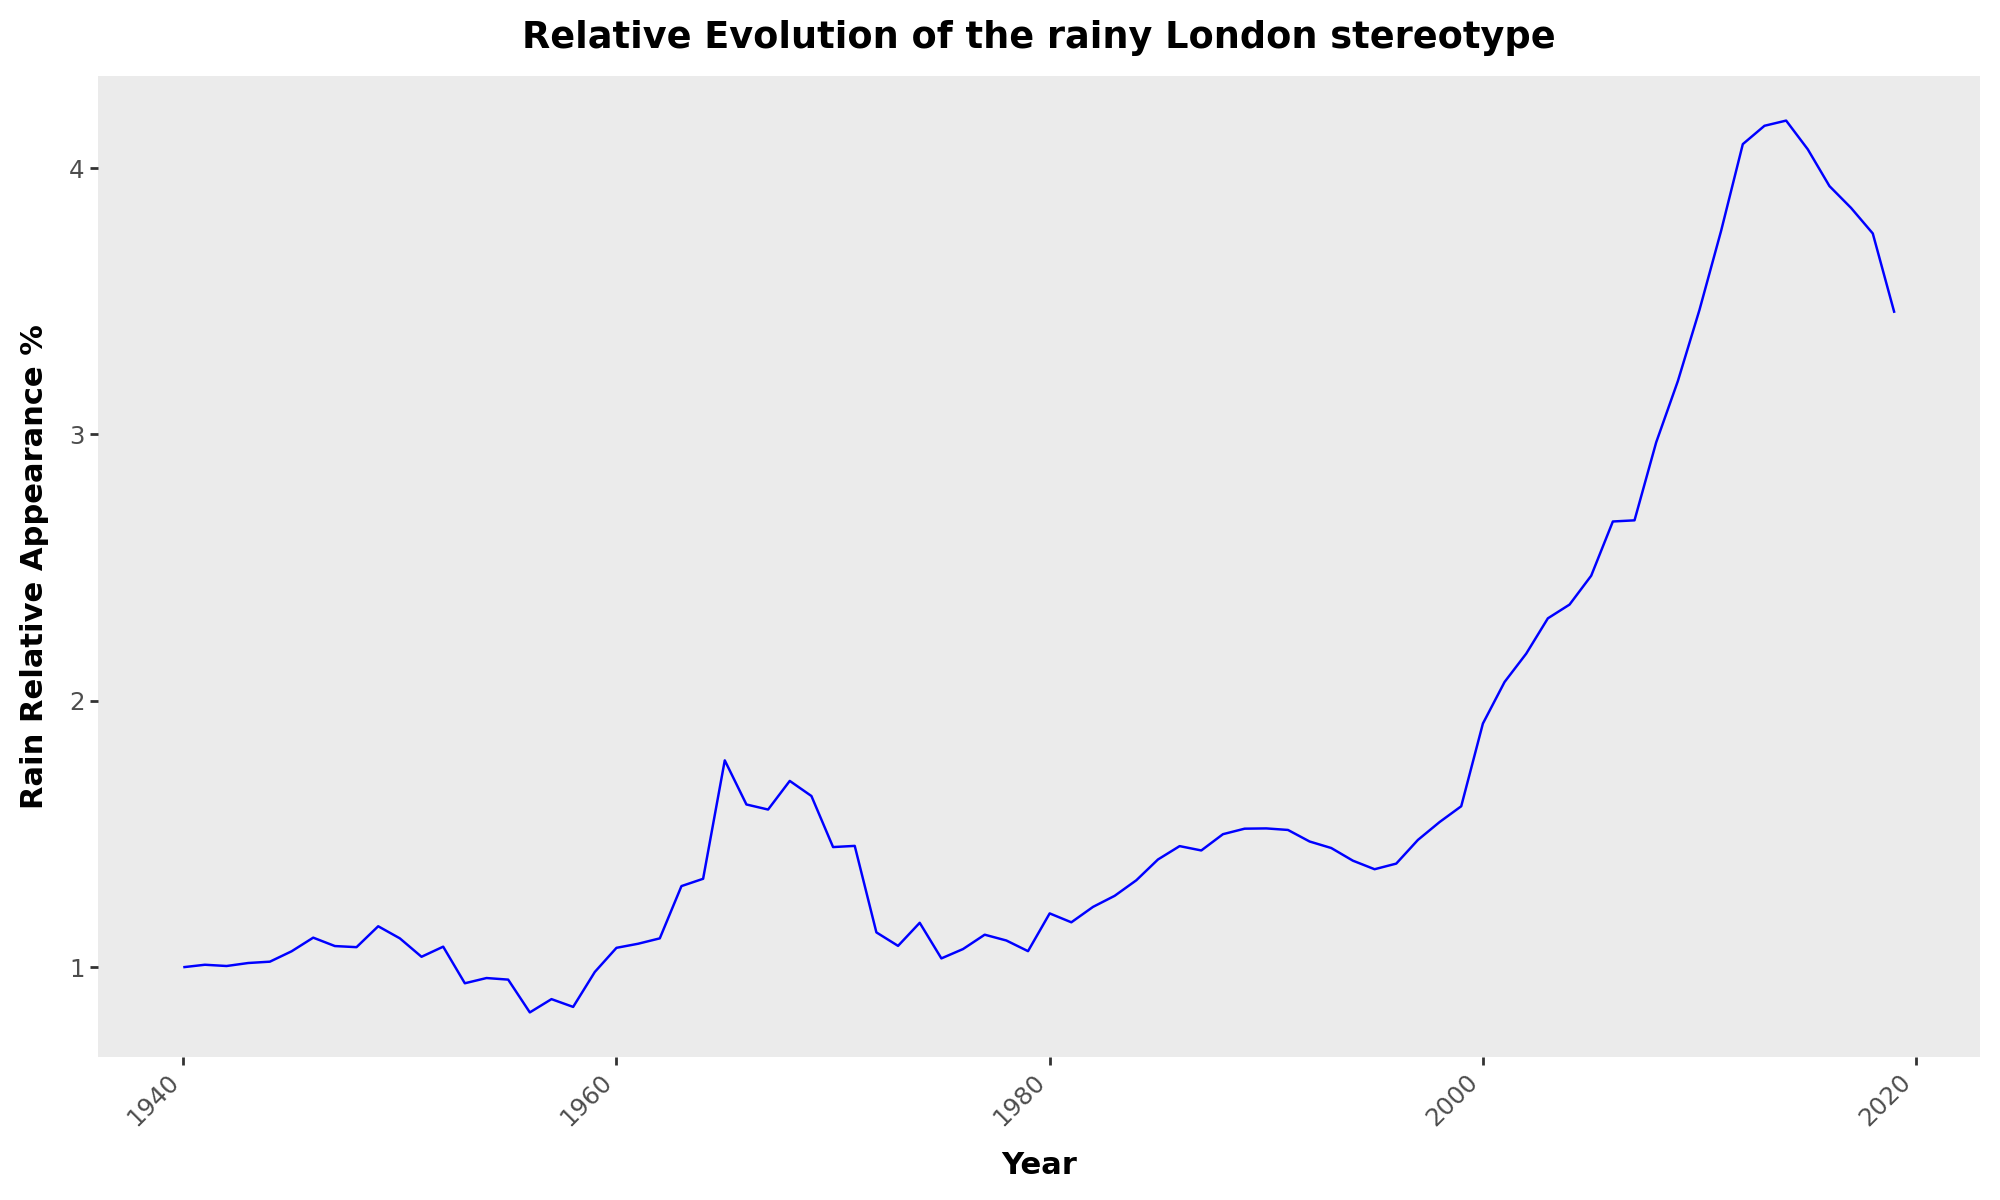

In [18]:
df = pd.read_sql('SELECT year, rain_relative_appearances FROM perception', engine)

g = (ggplot(df) +
    aes(x='year', y='rain_relative_appearances') +
    geom_line(color='blue') +
    labs(title='Relative Evolution of the rainy London stereotype', x='Year', y='Rain Relative Appearance %') +
    theme(axis_text_x=element_text(angle=45, hjust=1),
        axis_title=element_text(weight='bold'),
        plot_title=element_text(weight='bold'),
          panel_grid=element_blank()) +
    theme(figure_size=(10, 6))  # Adjust the figure size
)

g

In [70]:
query = '''SELECT 
                strftime('%Y', date) AS year,
                AVG(precipitation_hours) AS precipitation_hours
            FROM 
                weather
            GROUP BY 
                year;'''

query_2 = 'SELECT rain_relative_appearances FROM perception;'

df = pd.concat([pd.read_sql(query, engine), pd.read_sql(query_2, engine)], axis=1)
df['year'] = pd.to_numeric(df['year'])

/Users/olivergregory/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


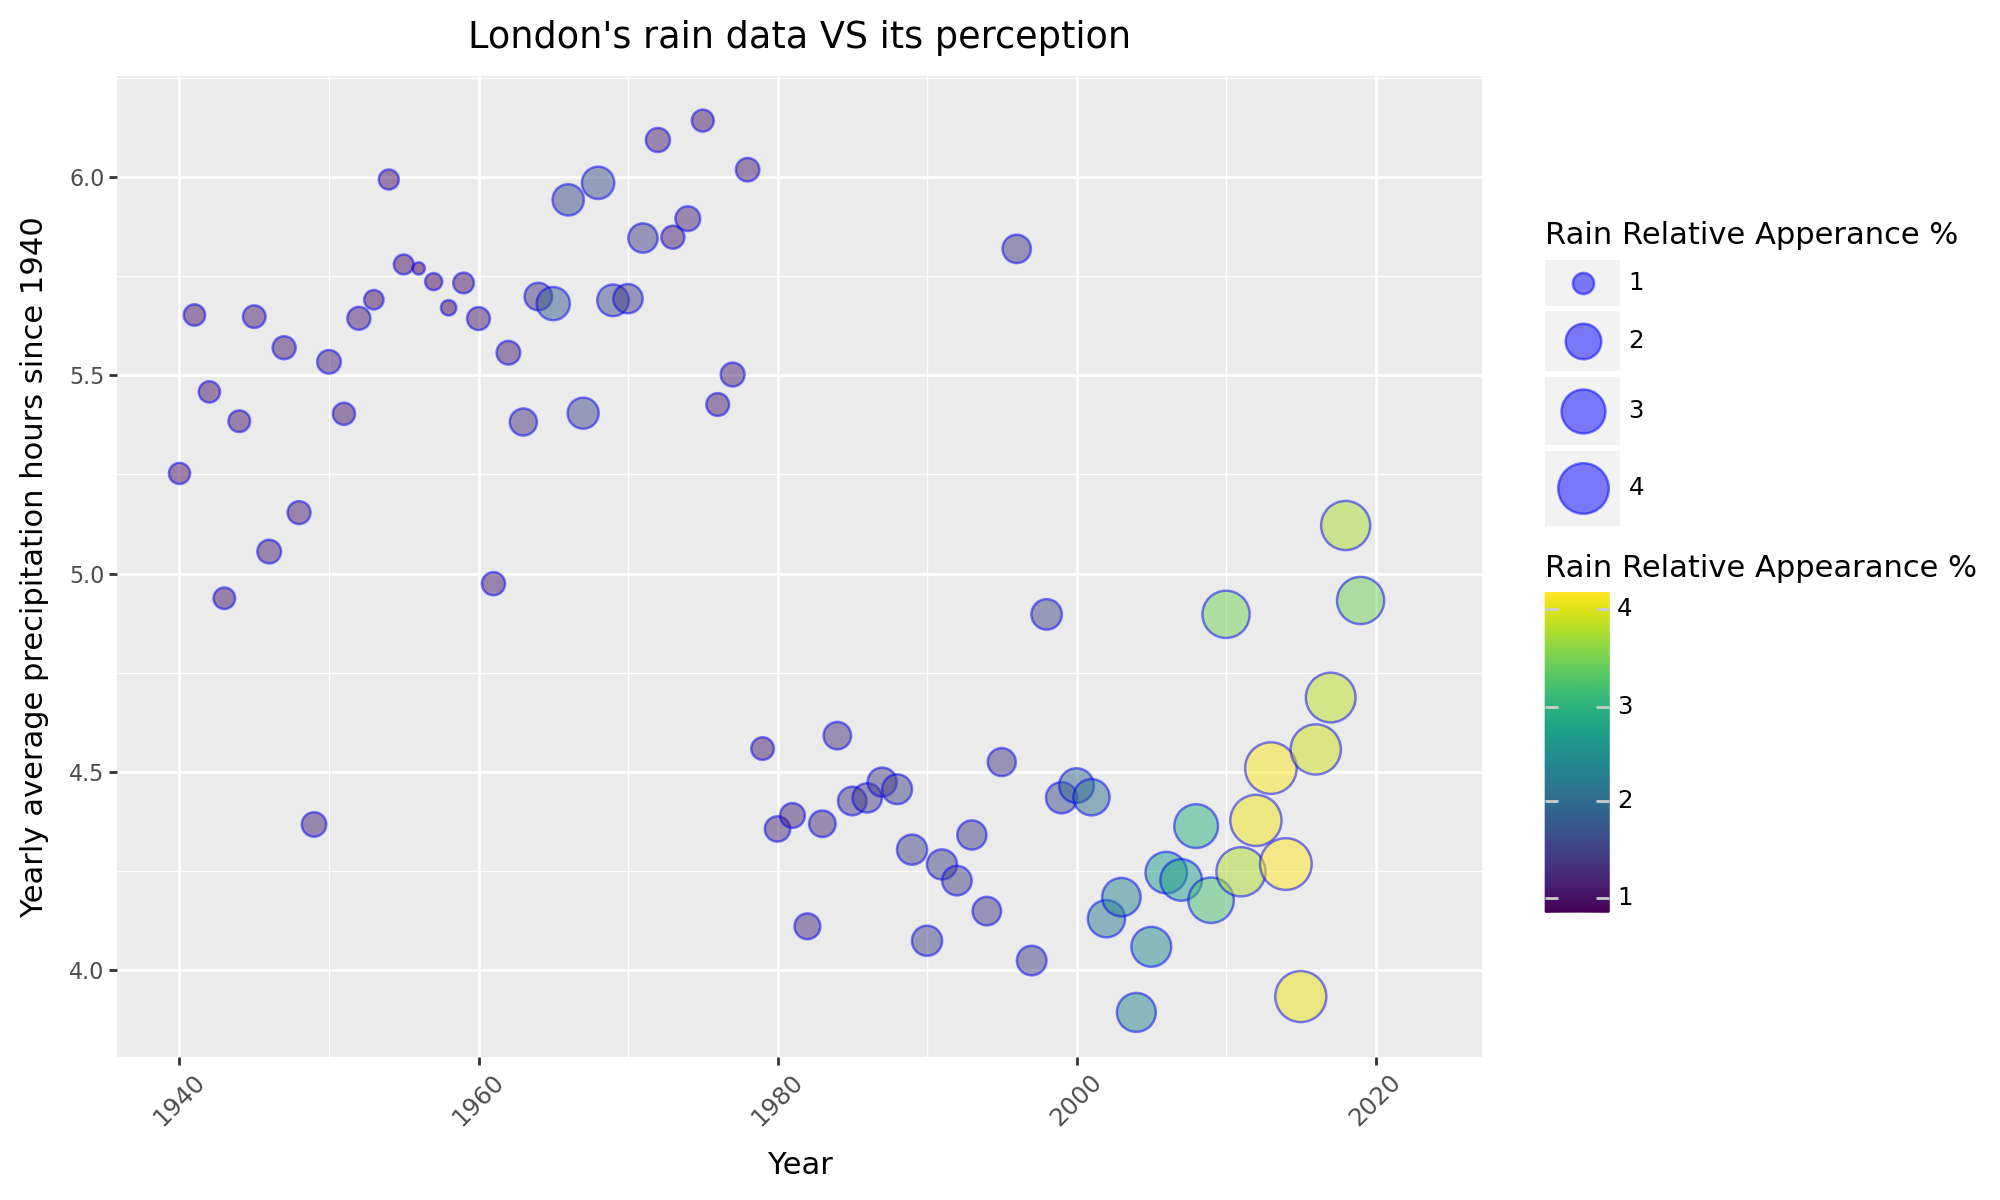

In [71]:
g = (ggplot(df, aes(x='year', y='precipitation_hours', size='rain_relative_appearances', fill = 'rain_relative_appearances')) + 
    geom_point(alpha=0.5, color='blue') + 
    scale_size_continuous(range=(2, 10), name='Rain Relative Apperance %') + 
    scale_fill_continuous(name='Rain Relative Appearance %') + 
    labs(title="London's rain data VS its perception", x='Year', y='Yearly average precipitation hours since 1940') + 
    theme(axis_text_y=element_text(size=8)) + 
    theme(figure_size=(10, 6)) + 
    theme(axis_text_x=element_text(rotation=45)) + 
    scale_x_continuous(breaks=range(1940,2021,20)))

# Display the plot
g

In [72]:
query = '''SELECT 
                strftime('%Y', date) AS year,
                AVG(sunshine_duration) AS sunshine_duration
            FROM 
                weather
            GROUP BY 
                year;'''

query_2 = 'SELECT rain_relative_appearances FROM perception;'

df = pd.concat([pd.read_sql(query, engine), pd.read_sql(query_2, engine)], axis=1)
df['year'] = pd.to_numeric(df['year'])

/Users/olivergregory/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


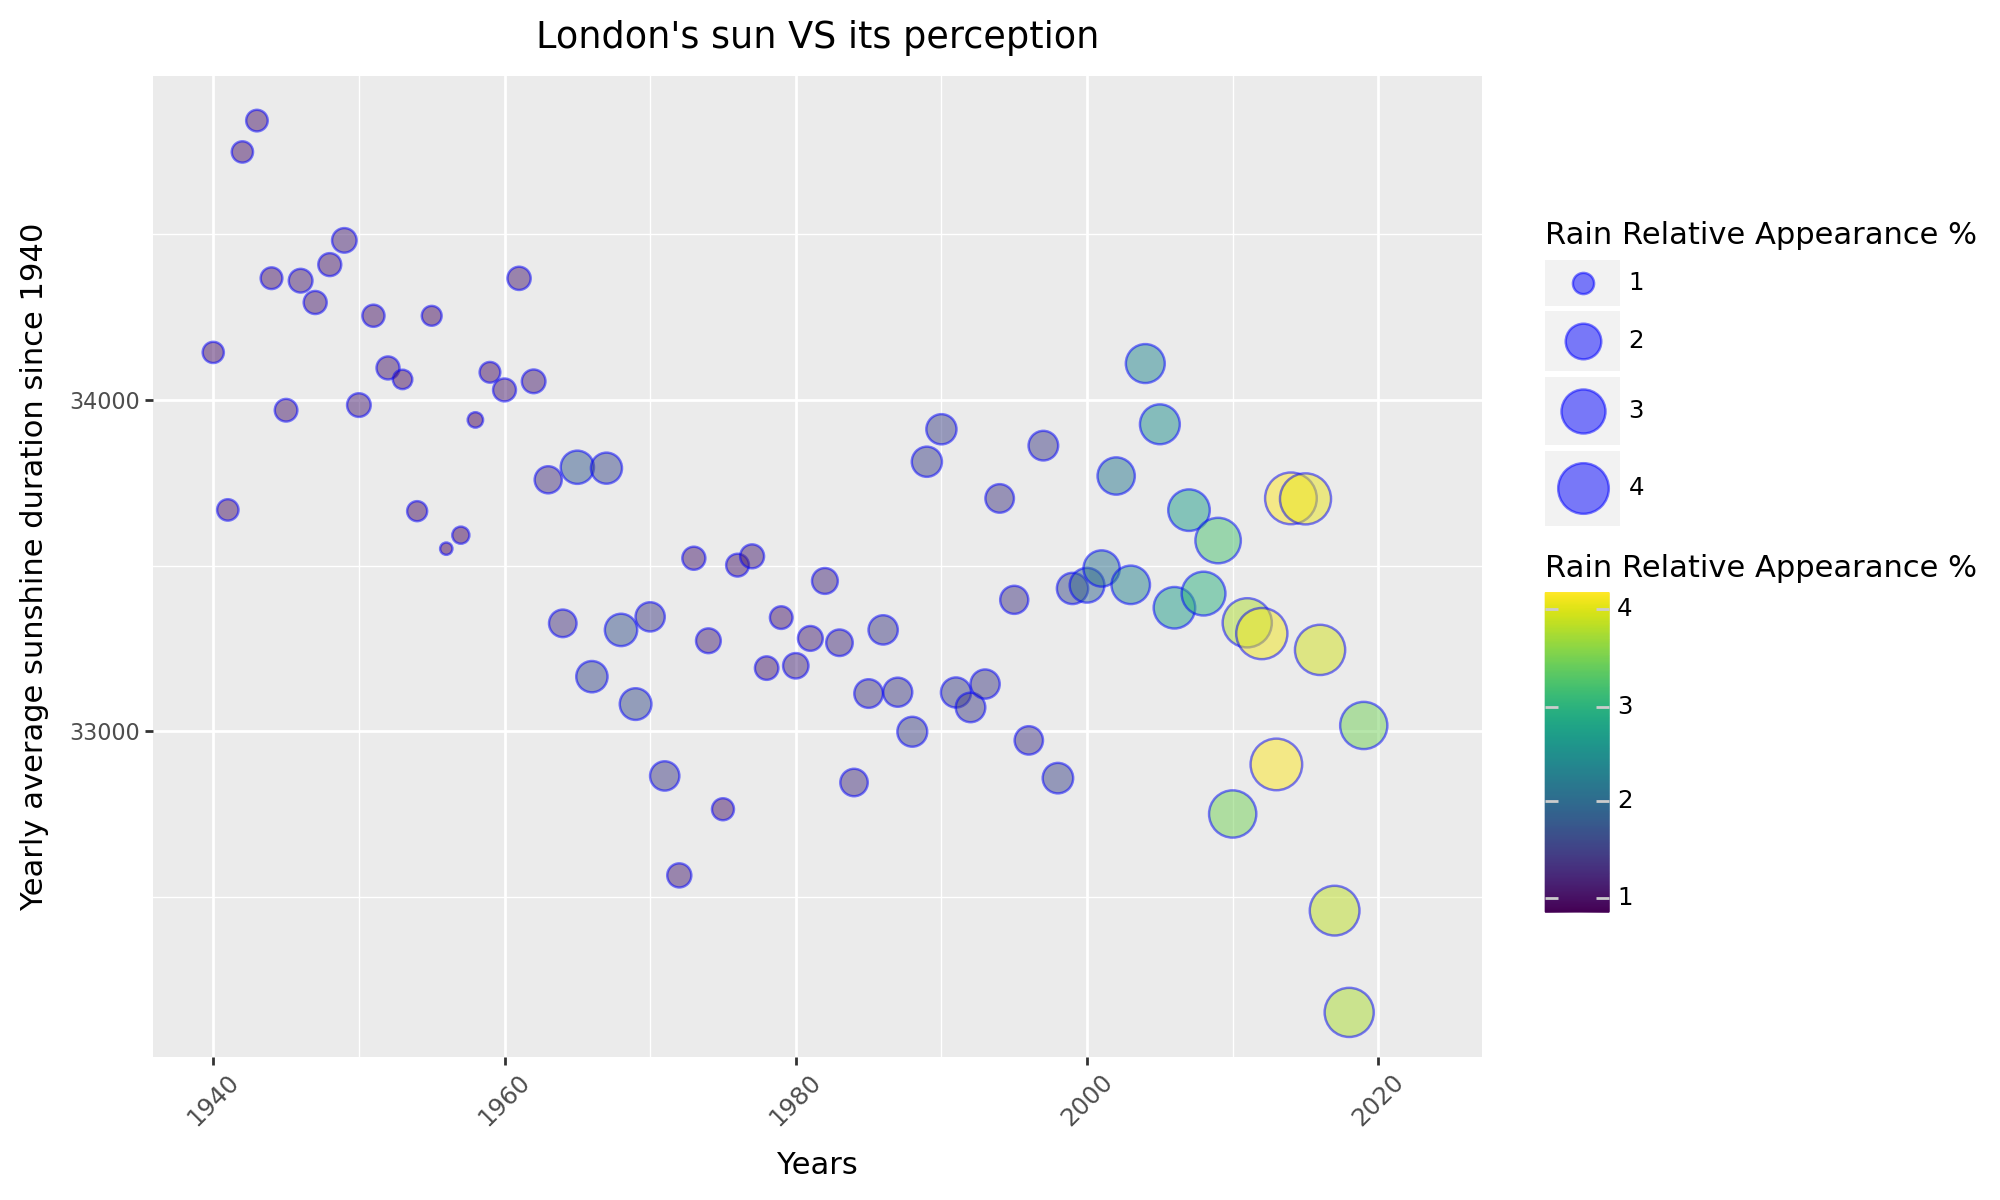

In [75]:
aesthetics = aes(x='year', y='sunshine_duration', size='rain_relative_appearances', fill = 'rain_relative_appearances')

# Create the plot
g = ggplot(df, aesthetics) + \
    geom_point(alpha=0.5, color='blue') + \
    scale_size_continuous(range=(2, 10), name='Rain Relative Appearance %') + \
    scale_fill_continuous(name='Rain Relative Appearance %') + \
    labs(title="London's sun VS its perception", x='Years', y='Yearly average sunshine duration since 1940') + \
    theme(axis_text_y=element_text(size=8)) + \
    theme(figure_size=(10, 6)) + \
    theme(axis_text_x=element_text(rotation=45))

g